/var/folders/kk/mr4t4jss0v3fbs24nvk11mdh0000gn/T/ipykernel_1350/1803647044.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/processed/merged_panel_clean_data.csv")


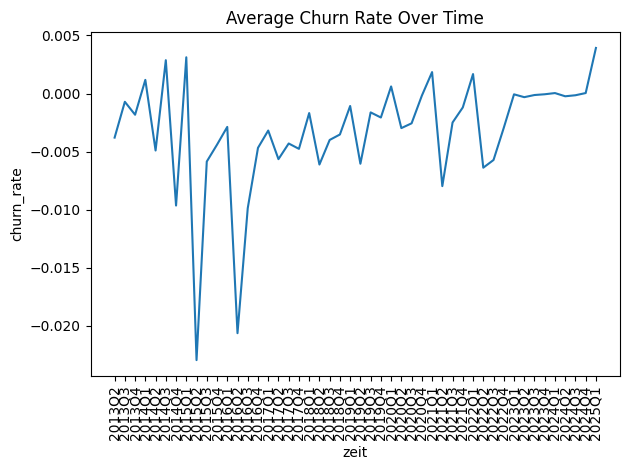

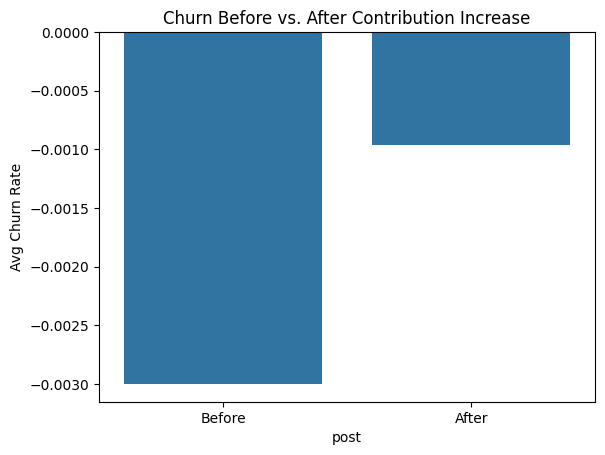

TypeError: 'value' must be an instance of str or bytes, not a float

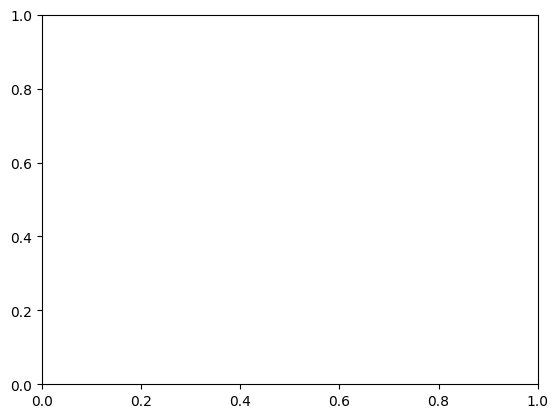

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../data/processed/merged_panel_clean_data.csv")
df["zeit"] = df["jahr"].astype(str) + "Q" + df["quartal"].astype(str)

# ▶️ Plot churn trend over time
def plot_churn_over_time():
    trend = df.groupby("zeit")["churn_rate"].mean().reset_index()
    sns.lineplot(data=trend, x="zeit", y="churn_rate")
    plt.xticks(rotation=90)
    plt.title("Average Churn Rate Over Time")
    plt.tight_layout()
    plt.show()

# ▶️ Churn before vs after treatment
def plot_churn_pre_post():
    df["post"] = df.groupby("kasse_clean")["treatment_flag"].transform(lambda x: x.cumsum() > 0)
    avg_churn = df.groupby("post")["churn_rate"].mean().reset_index()
    sns.barplot(data=avg_churn, x="post", y="churn_rate")
    plt.xticks([0, 1], ["Before", "After"])
    plt.title("Churn Before vs. After Contribution Increase")
    plt.ylabel("Avg Churn Rate")
    plt.show()

# ▶️ Churn by increase size, fund size, morbidity
def churn_correlations():
    sns.scatterplot(data=df, x="zusatzbeitrag", y="churn_rate")
    plt.title("Churn vs. Contribution")
    plt.show()

    sns.scatterplot(data=df, x="versicherte", y="churn_rate")
    plt.title("Churn vs. Fund Size")
    plt.xscale("log")
    plt.show()

    sns.scatterplot(data=df, x="morbidity_index", y="churn_rate")
    plt.title("Churn vs. Morbidity")
    plt.show()

if __name__ == "__main__":
    plot_churn_over_time()
    plot_churn_pre_post()
    churn_correlations()
